In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor

C:\New folder\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
import matplotlib.pyplot as plt

In [3]:
from scipy.stats import chi2_contingency
import seaborn as sns

In [4]:
os.chdir("C:/users/user")

In [5]:
pwd

'C:\\users\\user'

In [4]:
#load the data
df= pd.read_csv("day.csv")

In [7]:
df.shape

(731, 16)

In [8]:
#head or top of the dataset
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [9]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [10]:
#getting the structure of the dataset
type(df)

pandas.core.frame.DataFrame

In [11]:
#summary of the variable
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [12]:
#load the library for the Mising value analysis
from fancyimpute import KNN

C:\New folder\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [13]:
#create dataframe with missing percentage
missing_val= pd.DataFrame(df.isnull().sum())

In [14]:
missing_val

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [15]:
#insert inddex
missing_val= missing_val.reset_index()

In [16]:
missing_val

,index,0
0,instant,0
1,dteday,0
2,season,0
3,yr,0
4,mnth,0
5,holiday,0
6,weekday,0
7,workingday,0
8,weathersit,0
9,temp,0


{'boxes': [<matplotlib.lines.Line2D at 0xed35048>],
 'caps': [<matplotlib.lines.Line2D at 0xed35a58>,
 'fliers': [<matplotlib.lines.Line2D at 0xed44710>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xed442e8>],
 'whiskers': [<matplotlib.lines.Line2D at 0xed35198>,
  <matplotlib.lines.Line2D at 0xed35630>]}

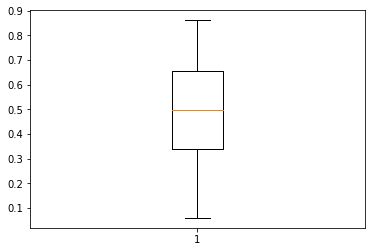

In [17]:
#boxplot to visualize the outliers
%matplotlib inline
plt.boxplot(df['temp'])

{'boxes': [<matplotlib.lines.Line2D at 0xef097b8>],
 'caps': [<matplotlib.lines.Line2D at 0xef11208>,
 'fliers': [<matplotlib.lines.Line2D at 0xef11e80>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xef11a58>],
 'whiskers': [<matplotlib.lines.Line2D at 0xef09908>,
  <matplotlib.lines.Line2D at 0xef09da0>]}

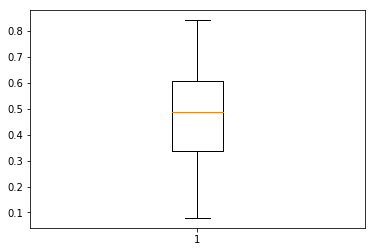

In [18]:
#boxplot to visualize the outliers
%matplotlib inline
plt.boxplot(df['atemp'])

{'boxes': [<matplotlib.lines.Line2D at 0xef74a90>],
 'caps': [<matplotlib.lines.Line2D at 0xef7c4e0>,
 'fliers': [<matplotlib.lines.Line2D at 0xef87198>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xef7cd30>],
 'whiskers': [<matplotlib.lines.Line2D at 0xef74be0>,
  <matplotlib.lines.Line2D at 0xef7c0b8>]}

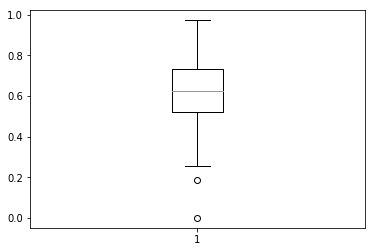

In [19]:
#boxplot
%matplotlib inline
plt.boxplot(df['hum'])

{'boxes': [<matplotlib.lines.Line2D at 0xefde128>],
 'caps': [<matplotlib.lines.Line2D at 0xefdeb38>,
 'fliers': [<matplotlib.lines.Line2D at 0xefe77f0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xefe73c8>],
 'whiskers': [<matplotlib.lines.Line2D at 0xefde278>,
  <matplotlib.lines.Line2D at 0xefde710>]}

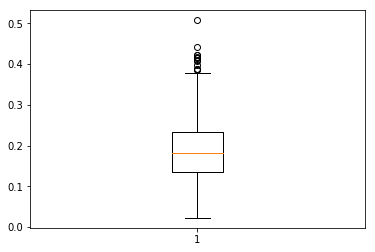

In [20]:
#boxplot
%matplotlib inline
plt.boxplot(df['windspeed'])

{'boxes': [<matplotlib.lines.Line2D at 0xf0414e0>],
 'caps': [<matplotlib.lines.Line2D at 0xf041ef0>,
 'fliers': [<matplotlib.lines.Line2D at 0xf047ba8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xf047780>],
 'whiskers': [<matplotlib.lines.Line2D at 0xf041630>,
  <matplotlib.lines.Line2D at 0xf041ac8>]}

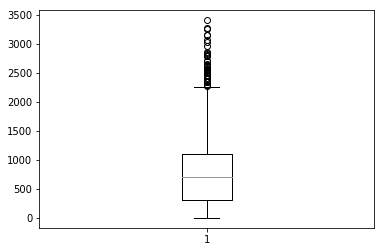

In [21]:
#boxplot
%matplotlib inline
plt.boxplot(df['casual'])

{'boxes': [<matplotlib.lines.Line2D at 0xf0a90f0>],
 'caps': [<matplotlib.lines.Line2D at 0xf0a9b00>,
 'fliers': [<matplotlib.lines.Line2D at 0xf0b17b8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xf0b1390>],
 'whiskers': [<matplotlib.lines.Line2D at 0xf0a9240>,
  <matplotlib.lines.Line2D at 0xf0a96d8>]}

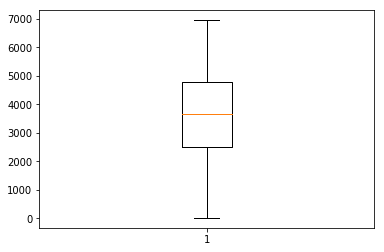

In [22]:
#boxplot
%matplotlib inline
plt.boxplot(df['registered'])

In [23]:
#save continuous variable
cnames=['temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered']
      

In [24]:
#detect and delete outliers
for i in cnames:
    print(i)
    q75, q25= np.percentile(df.loc[:,i],[75,25])
    iqr=q75-q25
    
    min=q25-(iqr*1.5)
    max=q75+(iqr*1.5)
    print(min)
    print(max)
    
    df= df.drop(df[df.loc[:,i]<min].index)
    df=df.drop(df[df.loc[:,i]>max].index)

temp
-0.14041600000000015
1.1329160000000003
atemp
-0.06829675000000018
1.0147412500000002
hum
0.20468725
1.0455212500000002
windspeed
-0.012431000000000025
0.380585
casual
-885.0
2323.0
registered
-840.0
8018.0


In [25]:
#replace outliers with NA & try to impute with mising value analysis
q75,q25= np.percentile (df['casual'],[75,25])

In [26]:
#calculate iqr
iqr= q75-q25

In [27]:
iqr

729.0

In [28]:
#ineer & outer fance
min= q25-(iqr*1.5)
max=q75+(iqr*1.5)

In [29]:
min

-788.75

In [30]:
max

2127.25

In [31]:
#replacing all the outliers with the value NA
df.loc[df['casual'] < min, : 'casual'] = np.nan
df.loc[df['casual'] > max, : 'casual']= np.nan

In [32]:
#calaulcte the missing value
missing_val= pd.DataFrame(df.isnull().sum())

In [33]:
#impute with KNN to impute missing value 
df= pd.DataFrame(KNN(k=3).complete(df), columns=df.columns)

ValueError: could not convert string to float: '12/31/2012'

In [34]:
#feature selection & feauture engineering
#correlation plot
df_corr= df.loc[:, cnames]

In [35]:
df_corr.shape

(676, 6)

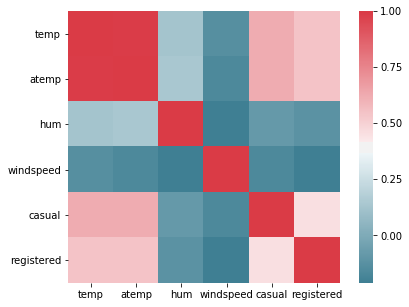

In [36]:
#plot the correlation plot
f,ax=plt.subplots(figsize=(7,5))

#generate or develop correlation matrix
corr= df_corr.corr()

#plot the seaborm library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap= sns.diverging_palette(220, 10, as_cmap= True), square= True, ax=ax)

In [41]:
#chi_square test of independece
#save categorical variable
cat_names=['instant', 'dteday','season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit']

In [42]:
#loop for the chi_sqaure Value
for i in cat_names:
    print(i)
    chi2, p, dof, ex=chi2_contingency(pd.crosstab(df['cnt'],df[i]))
    print(p)

instant
0.24387791724702115
dteday
0.24387791724702115
season
0.5126039012410083
yr
0.4048404791221478
mnth
0.4648202451670873
holiday
0.8017553367765226
weekday
0.4885289142962552
workingday
0.526371728511241
weathersit
0.5862223428849058


In [5]:
#delete those value which carrying redundent or irrelavant information from our master data
df=df.drop(['instant', 'dteday', 'temp'], axis=1)

C:\New folder\lib\site-packages\numpy\core\_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
C:\New folder\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


ValueError: range parameter must be finite.

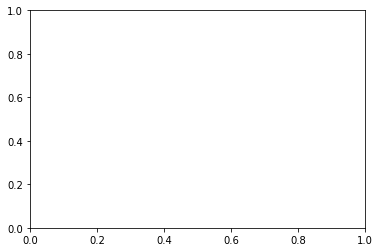

In [46]:
#feature scaling
%matplotlib inline
plt.hist(df['atemp'], bins='auto')

In [ ]:
#feature scaling
%matplotlib inline
plt.hist(df['Transportation expense'], bins='auto')

In [58]:
#save continuous variable
cnames=['casual', 'registered']

In [47]:
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'atemp', 'hum', 'windspeed', 'casual', 'registered',
       'cnt'],
      dtype='object')

In [59]:
#normalization
for i in cnames:
    print(i)
    df[i]=(df[i]-min(df[i]))/(max(df[i])-min(df[i]))

casual


TypeError: 'numpy.float64' object is not callable

In [50]:
df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,casual,registered,cnt
count,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,676.000000,676.000000
mean,2.499239,0.467275,6.552511,0.027397,2.980213,0.745814,1.409437,0.466810,0.633989,0.187668,703.261796,3628.752959,4374.575444
std,1.129057,0.499308,3.530451,0.163362,1.893805,0.435734,0.550584,0.165320,0.140635,0.072653,475.996780,1576.370496,1862.966924
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.079070,0.290000,0.022392,2.000000,20.000000,22.000000
25%,1.000000,0.000000,3.000000,0.000000,1.000000,0.000000,1.000000,0.324483,0.524583,0.134954,289.000000,2481.750000,3070.250000
50%,3.000000,0.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.466525,0.632917,0.179725,669.000000,3615.500000,4417.000000
75%,4.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.606067,0.734783,0.231358,1005.000000,4696.250000,5642.500000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.840896,0.972500,0.378108,2090.000000,6946.000000,8173.000000


In [53]:
df.shape

(676, 13)

In [20]:
#Decision Tree
# divide the data into Train & test Data
train,test=train_test_split(df, test_size=0.2)

In [21]:
#decision tree for regression
fit_DT= DecisionTreeRegressor(max_depth=2).fit(train.iloc[:, 0:12], train.iloc[:, 12])

In [22]:
fit_DT

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [23]:
#apply mode on the tset data
prediction_DT=fit_DT.predict(test.iloc[:, 0:12])

In [24]:
prediction_DT

array([3315.17910448, 4502.45283019, 1726.58974359, 6507.19680851,
       1726.58974359, 6507.19680851, 6507.19680851, 1726.58974359,
       4502.45283019, 1726.58974359, 6507.19680851, 6507.19680851,
       6507.19680851, 4502.45283019, 3315.17910448, 6507.19680851,
       3315.17910448, 4502.45283019, 3315.17910448, 6507.19680851,
       4502.45283019, 3315.17910448, 6507.19680851, 4502.45283019,
       1726.58974359, 4502.45283019, 6507.19680851, 6507.19680851,
       6507.19680851, 1726.58974359, 6507.19680851, 1726.58974359,
       1726.58974359, 3315.17910448, 4502.45283019, 4502.45283019,
       6507.19680851, 3315.17910448, 4502.45283019, 6507.19680851,
       4502.45283019, 3315.17910448, 1726.58974359, 4502.45283019,
       4502.45283019, 1726.58974359, 4502.45283019, 4502.45283019,
       1726.58974359, 1726.58974359, 6507.19680851, 3315.17910448,
       6507.19680851, 4502.45283019, 6507.19680851, 4502.45283019,
       4502.45283019, 1726.58974359, 4502.45283019, 1726.58974

In [25]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [26]:
MSE= mean_squared_error(test.iloc[:,12], prediction_DT)

In [27]:
MSE

694949.4242379803

In [28]:
#calculate MAPE
def MAPE(y_true,y_pred):
    mape=np.mean(np.abs((y_true - y_pred)/y_true))
    return mape

In [ ]:
prediction_DT

In [29]:
MAPE(test.iloc[:,12], prediction_DT)

0.7016350860006048

In [30]:
#LINEAR REGRESSION
#import libraries for LR
import statsmodels.api as sm

#train the model using the training sets
model= sm.OLS(train.iloc[:,12], train.iloc[:, 0:12]).fit()

C:\New folder\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [31]:
#print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.595e+31
Date:                Sun, 22 Jul 2018   Prob (F-statistic):               0.00
Time:                        08:51:54   Log-Likelihood:                 14482.
No. Observations:                 584   AIC:                        -2.894e+04
Df Residuals:                     572   BIC:                        -2.889e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
season      1.194e-12   3.16e-13      3.776      0.000    5.73e-13    1.81e-12
yr           2.53e-12   5.92e-13      4.274      0.000    1.37e-12    3.69e-12
mnth         1.35e-13   9.16e-14      1.473      0.141    -4.5e-14    3.15e-13
holiday     -1.99e-13   1.31e-12     -0.152      0.879   -2.78e-12    2.38e-12
weekday     1.084e-13   8.47e-14      1.280      0.201   -5.79e-14    2.75e-13
workingday  4.121e-13   6.68e-13      0.617      0.537      -9e-13    1.72e-12
weathersit  1.954e-13   4.35e-13      0.449      0.654   -6.59e-13    1.05e-12
atemp       3.411e-12   1.69e-12      2.022      0.044     9.8e-14    6.72e-12
hum        -2.416e-13   1.36e-12     -0.177      0.859   -2.92e-12    2.43e-12
windspeed   1.364e-12      2e-12      0.683      0.495   -2.56e-12    5.29e-12
casual         1.0000   4.84e-16   2.07e+15      0.000       1.000       1.000
registered     1.0000   2.88e-16   3.47e+15      0.000       1.000       1.000
==============================================================================
Omnibus:                       20.391   Durbin-Watson:                   0.304
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.424
Skew:                          -0.450   Prob(JB):                     2.23e-05
Kurtosis:                       2.737   Cond. No.                     4.80e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
#make the prediction by the model
prediction_LR= model.predict(test.iloc[:,0:12])

In [33]:
prediction_LR

421    3389.0
110    4189.0
45     1815.0
597    6530.0
359    1317.0
453    6133.0
620    7870.0
67     1891.0
611    6034.0
5      1606.0
571    8173.0
574    6685.0
580    7175.0
216    4866.0
76     3239.0
564    5713.0
350    2739.0
137    3855.0
112    4036.0
565    6591.0
207    4656.0
149    4098.0
495    6572.0
270    3907.0
6      1510.0
221    4780.0
471    6370.0
618    7525.0
717    5557.0
61     1685.0
        ...  
71     2417.0
468    6398.0
82     1865.0
667      22.0
208    4390.0
515    6855.0
481    5026.0
93     3115.0
150    3982.0
142    4274.0
550    7403.0
54     1807.0
282    5117.0
408    3422.0
289    4570.0
643    8156.0
290    4748.0
725     441.0
692    3910.0
333    3613.0
649    7570.0
577    7216.0
139    4917.0
429    3333.0
447    8362.0
728    1341.0
522    7055.0
502    7384.0
585    7534.0
607    7713.0
Length: 147, dtype: float64

In [81]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [35]:
#calculate MAPE
MAPE(test.iloc[:,12], prediction_LR)

4.8306426203002494e-15

In [6]:
#stratified sampling
from sklearn.cross_validation import train_test_split


In [10]:
X= df.values[:, 0:12]
Y= df.values[:, 12]

X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.2)

In [11]:
#randomforest
from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestClassifier(n_estimators=500).fit(X_train, Y_train)

In [12]:
RF_prediction=RF_model.predict(X_test)

In [39]:
#calculate MAPE
MAPE(test.iloc[:,12], RF_prediction)

1.909654798602576

In [36]:
#KNN python k nearest neighbour
#KNN Implementation
from sklearn.neighbors import KNeighborsClassifier

KNN_model= KNeighborsClassifier(n_neighbors=7).fit(X_train, Y_train)

In [43]:
from knn import knn
from sklearn.metrics import mean_squared_error

for k in [1, 3, 20]:
    classifier = knn(x,y, k)
    pred_test = classifier.predict(X_test)

    test_error = mean_squared_error(Y_test, pred_test)
    print("Test error with k={}: {}".format(k, test_error * len(Y_test)/2))

ModuleNotFoundError: No module named 'knn'

In [40]:
KNN_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [37]:
#predict test cases
KNN_predictions=KNN_model.predict(X_test)

In [38]:
#calculate MAPE
MAPE(test.iloc[:,13], KNN_predictions)

IndexError: single positional indexer is out-of-bounds